In [67]:
import numpy as np
from scipy.optimize import linprog

# Part 3

In [43]:
def next_step(A, b, x, y, s, mu):

    m = x.shape[0]
    e = np.ones_like(x)

    X = np.diag(x)
    S = np.diag(s)
    S_inv = np.linalg.inv(S)

    mu_prime = (1 - (1/(6*np.sqrt(m)))) * mu

    k = np.linalg.inv(A @ S_inv @ X @ A.T) @ (b - mu_prime * A @ S_inv @ e)
    f = -A.T @ k
    h = -X @ S_inv @ f + mu_prime * S_inv @ e - x

    x_prime = x + h
    y_prime = y + k
    s_prime = s + f

    return(x_prime, y_prime, s_prime, mu_prime)


# Part 6 
i will do the appropriate calculations in python to show that all the inequalities hold for the provided vectors:\
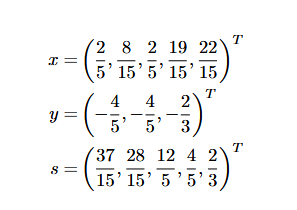

In [65]:
import numpy as np

#c, A, and b were already provided in the description of the LP.

c = np.array([-3, -4, 0, 0, 0])

A = np.array([[3, 3, 3, 0, 0],
              [3, 1, 0, 1, 0],
              [1, 4, 0, 0, 1]])

b = np.array([4, 3, 4])

#The following are the proposed feasible solution vectors

x = np.array([2/5, 8/15, 2/5, 19/15, 22/15])

y = np.array([-4/5, -4/5, -2/3])

s = np.array([37/15, 28/15, 12/5, 4/5, 2/3])

#It is clear that both s and x are non-negative

proposed_b = A @ x
display(b, proposed_b)

proposed_c = A.T @ y + s
display(c, proposed_c)

array([4, 3, 4])

array([4., 3., 4.])

array([-3, -4,  0,  0,  0])

array([-3.0000000e+00, -4.0000000e+00, -4.4408921e-16,  0.0000000e+00,
        0.0000000e+00])

In [66]:
#A, b, x, y, s are already set

epsilon = 1e-20
mu = 1

counter = 0

while True:

    x_prime, y_prime, s_prime, mu_prime = next_step(A, b, x, y, s, mu)

    if np.linalg.norm(x - x_prime) < epsilon and np.linalg.norm(y - y_prime) < epsilon and np.linalg.norm(s - s_prime) < epsilon:
        break

    x = x_prime
    y = y_prime
    s = s_prime
    mu = mu_prime

    counter += 1

for i in range(x_prime.shape[0]):

    if x_prime[i] < s_prime[i]:
        x_prime[i] = 0
    else:
        s_prime[i] = 0

print(x_prime, y_prime, s_prime, mu_prime, counter)

[0.44444444 0.88888889 0.         0.77777778 0.        ] [-8.88888889e-01 -8.69123446e-56 -3.33333333e-01] [0.         0.         2.66666667 0.         0.33333333] 6.759849026392404e-56 1639


# Part 12
Using a commercial solver to see the results.

In [72]:
res_simplex = linprog(c=c, A_eq=A, b_eq=b, method="simplex")
res_simplex.x

C:\Users\matej\AppData\Local\Temp\ipykernel_28872\474665998.py:1: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_simplex = linprog(c=c, A_eq=A, b_eq=b, method="simplex")


array([0.44444444, 0.88888889, 0.        , 0.77777778, 0.        ])

In [73]:
res_interior_point = linprog(c=c, A_eq=A, b_eq=b, method="interior-point")
res_interior_point.x

C:\Users\matej\AppData\Local\Temp\ipykernel_28872\1934601974.py:1: DeprecationWarning: `method='interior-point'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_interior_point = linprog(c=c, A_eq=A, b_eq=b, method="interior-point")


array([4.44444444e-01, 8.88888889e-01, 2.08281560e-13, 7.77777778e-01,
       1.89801298e-14])